In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [3]:
%matplotlib inline
warnings.filterwarnings('ignore')

In [28]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [29]:
plt.style.use('bmh')

In [4]:
train = pd.read_csv('train.csv')

In [5]:
test = pd.read_csv('test.csv')

In [6]:
print('Shape of Test :',test.shape)
print('Shape of Train :',train.shape)

Shape of Test : (1459, 80)
Shape of Train : (1460, 81)


In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
#This Means our target column is the SalePrice Feature
#This problem involves creating the best suitable model to predict the SalePrice for the test data

In [135]:
#A quick check for duplicate data
#Using the ID Column
Unique = len(set(train.Id))
Total = len(train.Id)
dub = Total - Unique
dub == 0

True

In [ ]:
#Hence no Duplicate Data

In [11]:
len(train.columns)

81

In [12]:
numerical_features = train.select_dtypes(include=[np.number])
categorical_features = train.select_dtypes(exclude=[np.number])

In [14]:
len(numerical_features.columns)


38

In [20]:
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [17]:
null = train.isnull().sum().sort_values(ascending=False)

In [18]:
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending=False)

In [21]:
missing_data = pd.concat([null,percent],axis=1,keys=['Null','Percentage(%)'])

In [23]:
missing_data = missing_data[missing_data['Null'] != 0]

Text(0,0.5,'Percentage(%)')

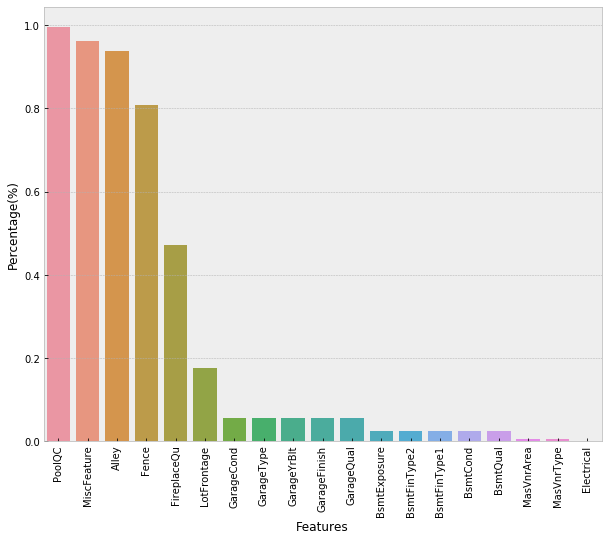

In [30]:
plt.figure(figsize=(10,8))
sns.barplot(x = missing_data.index,y=missing_data['Percentage(%)'])
plt.xticks(rotation=90)
plt.xlabel('Features',fontsize = 12)
plt.ylabel('Percentage(%)',fontsize = 12)

In [33]:
pd.DataFrame(train.SalePrice.describe())


,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [63]:
print('The Skewness of this SalePrice Target is :', train.SalePrice.skew())
print('Kurtosis : %f' %train.SalePrice.kurt())

The Skewness of this SalePrice Target is : 1.8828757597682129
Kurtosis : 6.536282


In [35]:
target = np.log(train.SalePrice)

In [36]:
print('The Skewness of this Target Column is :', target.skew())

The Skewness of this Target Column is : 0.12133506220520406


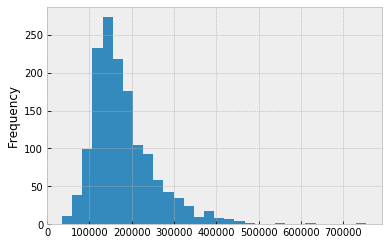

In [37]:
train.SalePrice.plot.hist(bins=30)

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.,  900000.]),
 <a list of 11 Text xticklabel objects>)

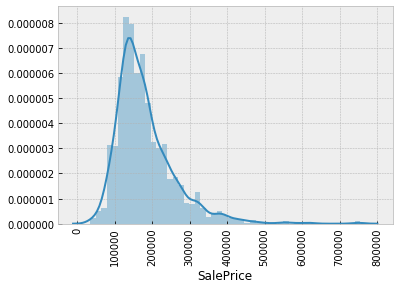

In [62]:
sns.distplot(train['SalePrice'])
plt.xticks(rotation=90)

In [72]:
corr = numerical_features.corr()

In [43]:
corr =corr['SalePrice'].sort_values(ascending=False)


In [44]:
corr[:5]

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64

In [46]:
corr[-5:]

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [47]:
OverallvsSalePrice = train.pivot_table(index = 'OverallQual',values='SalePrice',aggfunc=np.mean)

In [48]:
OverallvsSalePrice

,SalePrice
OverallQual,
1,50150.000000
2,51770.333333
3,87473.750000
4,108420.655172
5,133523.347607
6,161603.034759
7,207716.423197
8,274735.535714
9,367513.023256


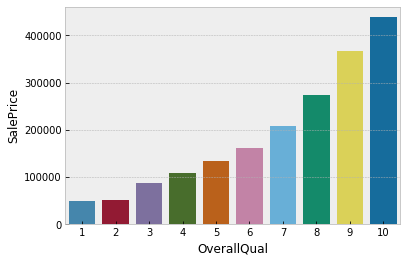

In [54]:
sns.barplot(OverallvsSalePrice.index,OverallvsSalePrice['SalePrice'],orient='v')

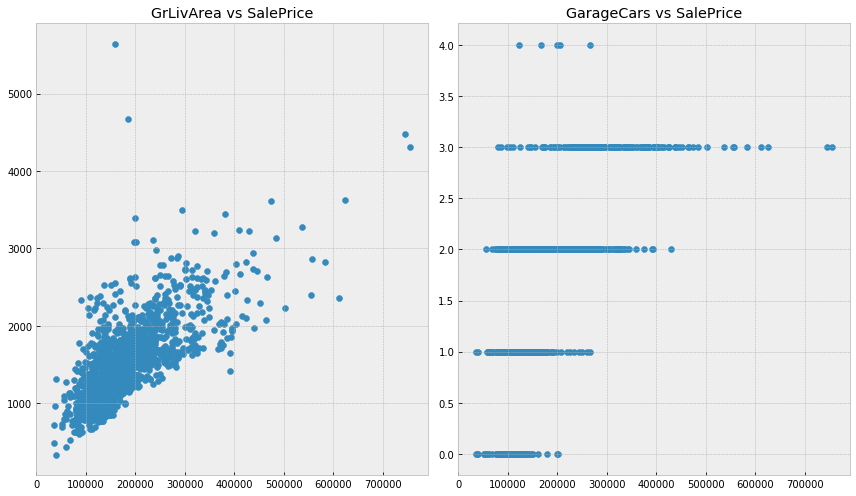

In [60]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.scatter(x=train['SalePrice'],y=train['GrLivArea'])
plt.title('GrLivArea vs SalePrice')

plt.subplot(1,2,2)
plt.scatter(x=train['SalePrice'],y=train['GarageCars'])
plt.title('GarageCars vs SalePrice')
plt.tight_layout()

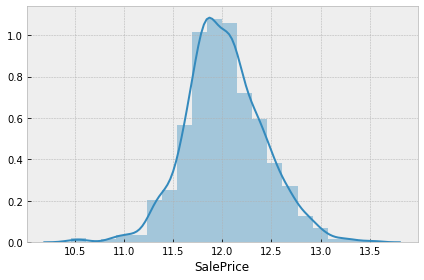

In [69]:
#To make the salePrice distribution more symmetrical, we do a logarithmic distribution of the target column
sns.distplot(np.log(train.SalePrice),bins=20)
plt.tight_layout()

In [70]:
train.SalePrice = np.log(train.SalePrice)

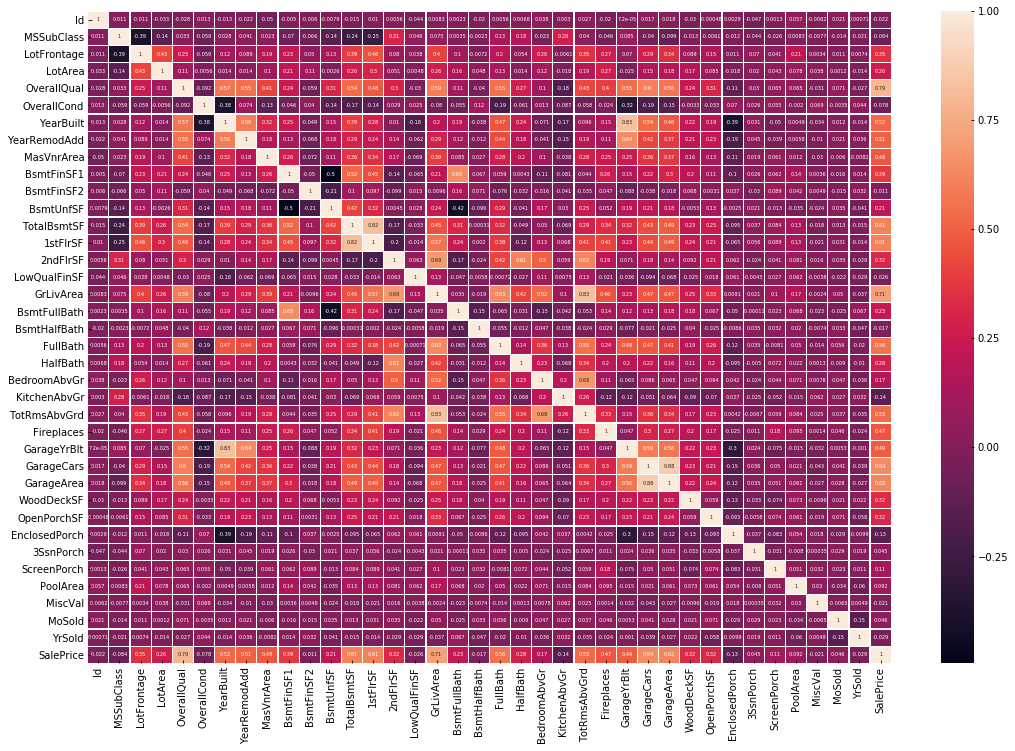

In [79]:
plt.figure(figsize=(18,12))
sns.heatmap(corr,annot=True,annot_kws={'size':5},linewidth = 0.2)

In [80]:
categorical_features.columns


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [81]:
numerical_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [84]:
year = train.YearBuilt.value_counts().reset_index(name='YearBuilt')

In [89]:
year.columns = ['YearBuilt','Count']

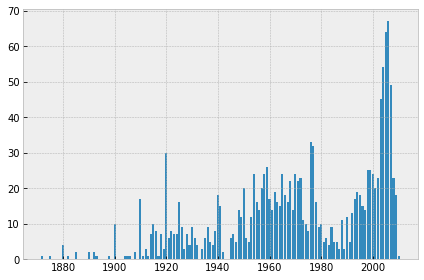

In [96]:
plt.bar(year['YearBuilt'],year['Count'])
plt.tight_layout()

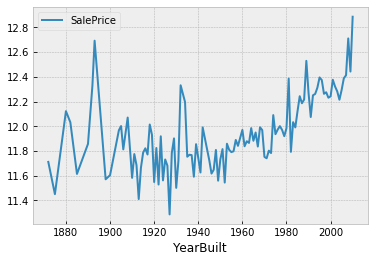

In [100]:
train[['YearBuilt','SalePrice']].groupby(['YearBuilt']).mean().plot()
#SalePrice incre

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

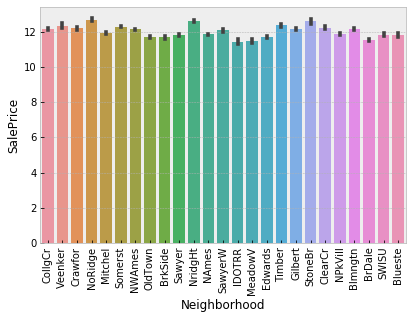

In [103]:
sns.barplot('Neighborhood','SalePrice',data=train)
plt.tight_layout()
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

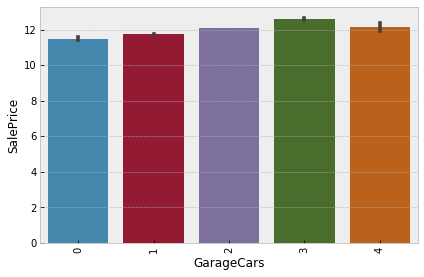

In [105]:
sns.barplot('GarageCars','SalePrice',data=train)
plt.tight_layout()
plt.xticks(rotation=90)

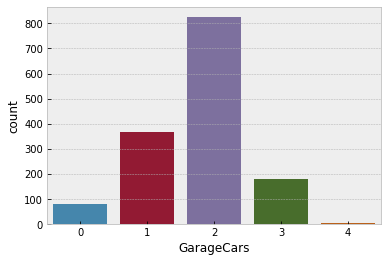

In [106]:
sns.countplot(train.GarageCars)

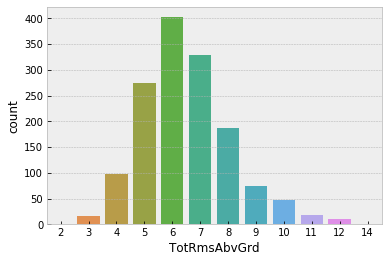

In [107]:
sns.countplot(train.TotRmsAbvGrd)

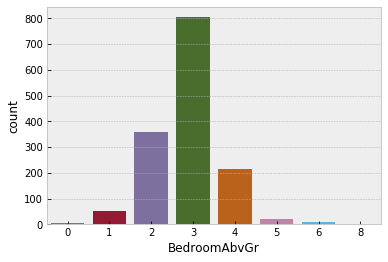

In [110]:
sns.countplot(train.BedroomAbvGr)

In [171]:
data_merged = pd.concat([train,test],sort=False,ignore_index=True)

In [112]:
print(data_merged.shape)

(2919, 81)


In [113]:
data_merged.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
2918,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [119]:
sale_condition = train.pivot_table(values='SalePrice',index='SaleCondition',aggfunc= np.mean)

In [121]:
np.exp(sale_condition['SalePrice'])

SaleCondition
Abnorml    131764.864540
AdjLand    101635.376493
Alloca     149411.239176
Family     142864.920371
Normal     163576.114402
Partial    254607.028211
Name: SalePrice, dtype: float64

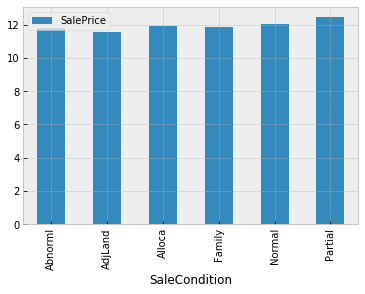

In [116]:
sale_condition.plot(kind='bar')

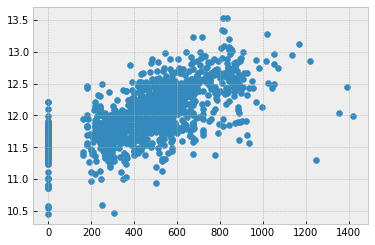

In [123]:
plt.scatter(x=train['GarageArea'],y=target)

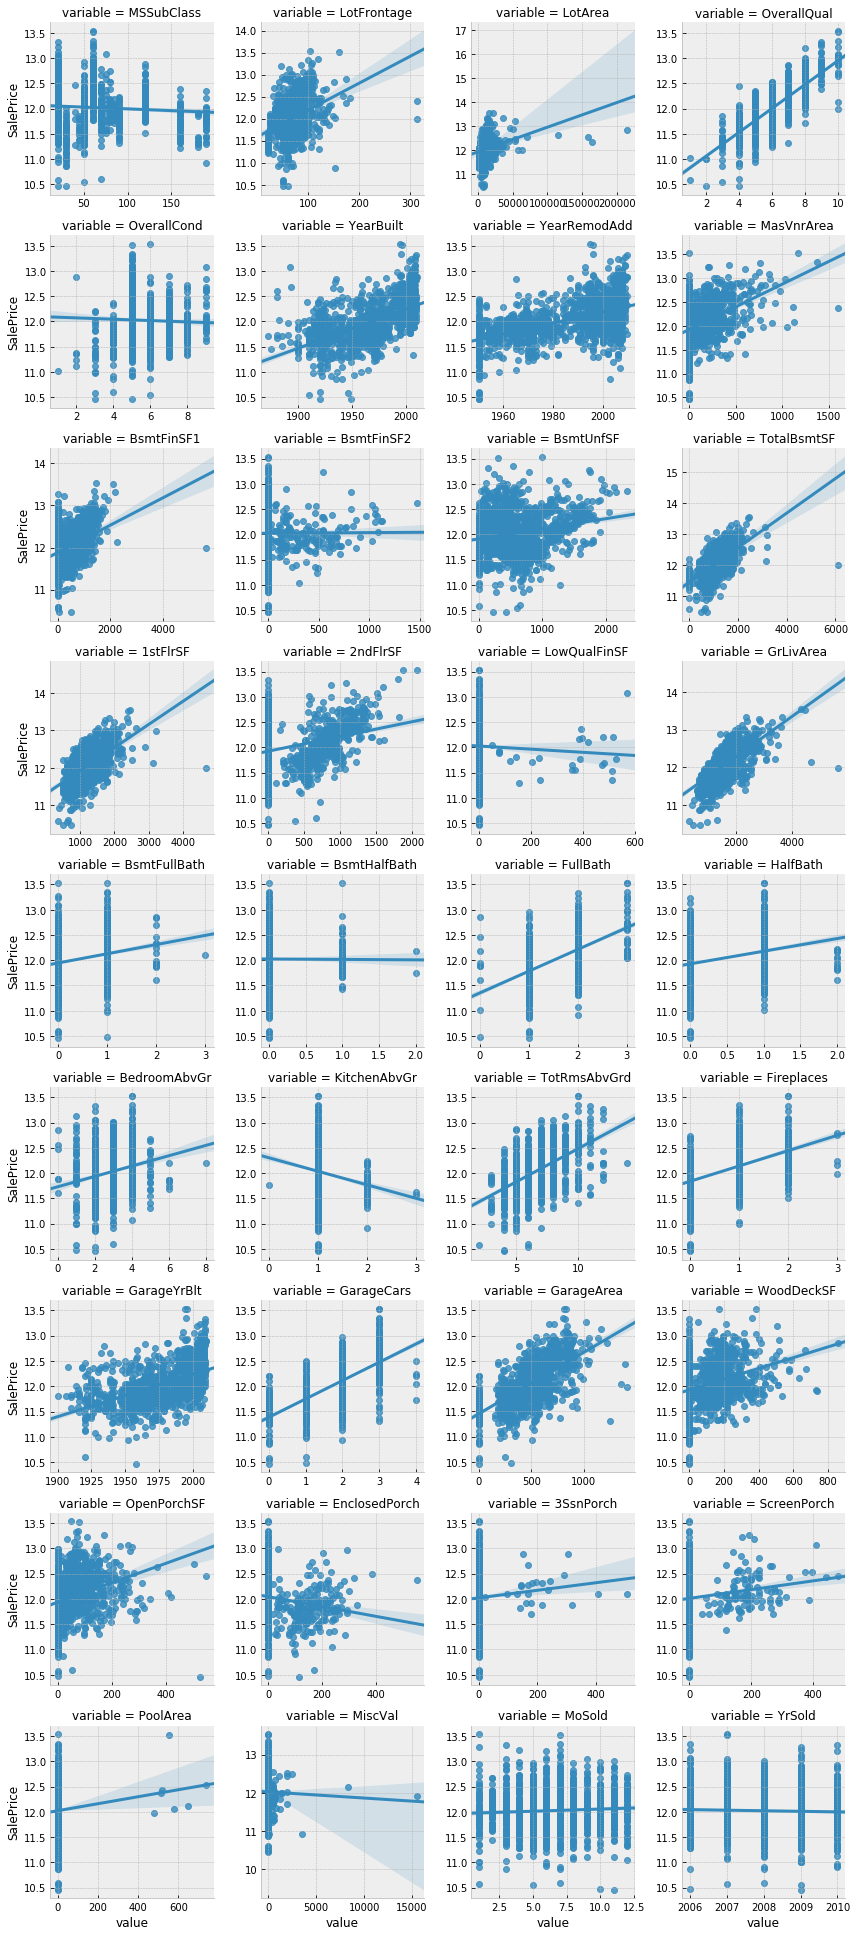

In [124]:
pd_melt = pd.melt(train, id_vars=['SalePrice'],value_vars = [i for i in numerical_features if i not in ['Id', 'SalePrice']])
g = sns.FacetGrid(data=pd_melt, col="variable", col_wrap=4, sharex=False, sharey=False)
g.map(sns.regplot, 'value', 'SalePrice')


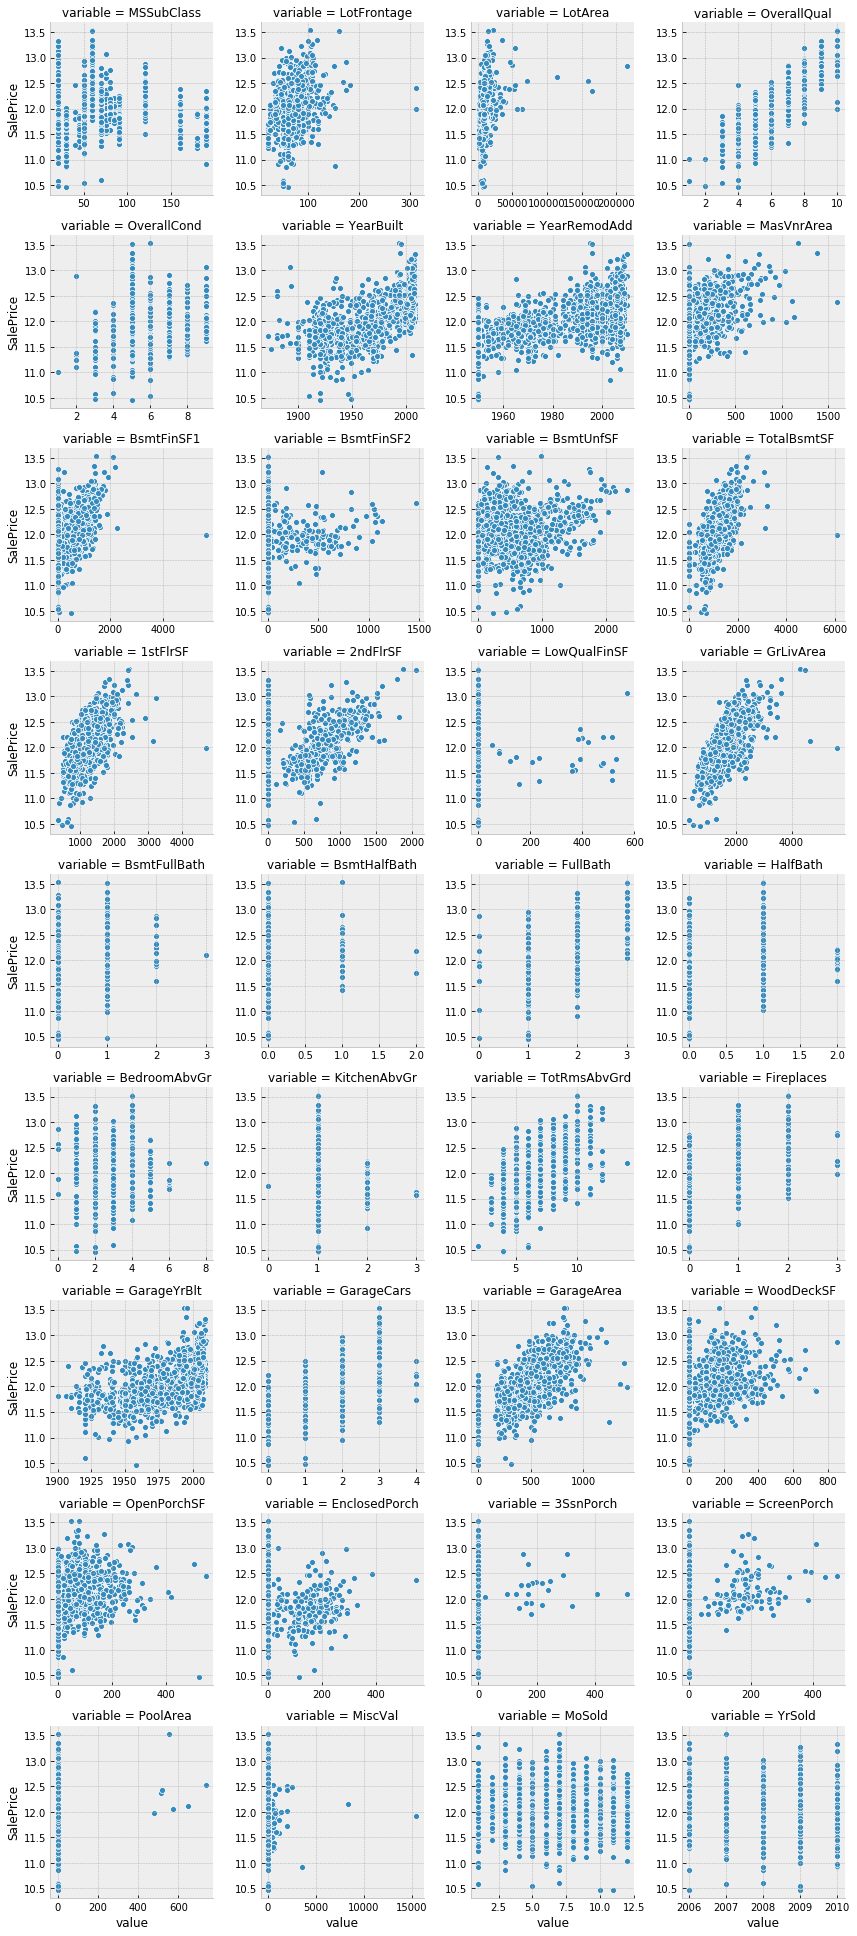

In [155]:
pd_melt = pd.melt(train, id_vars=['SalePrice'],value_vars = [i for i in numerical_features if i not in ['Id', 'SalePrice']])
g = sns.FacetGrid(data=pd_melt, col="variable", col_wrap=4, sharex=False, sharey=False)
g.map(sns.scatterplot, 'value', 'SalePrice')

In [131]:
pd_melt.head()

,SalePrice,variable,value
0,12.247694,MSSubClass,60.0
1,12.109011,MSSubClass,20.0
2,12.317167,MSSubClass,60.0
3,11.849398,MSSubClass,70.0
4,12.429216,MSSubClass,60.0


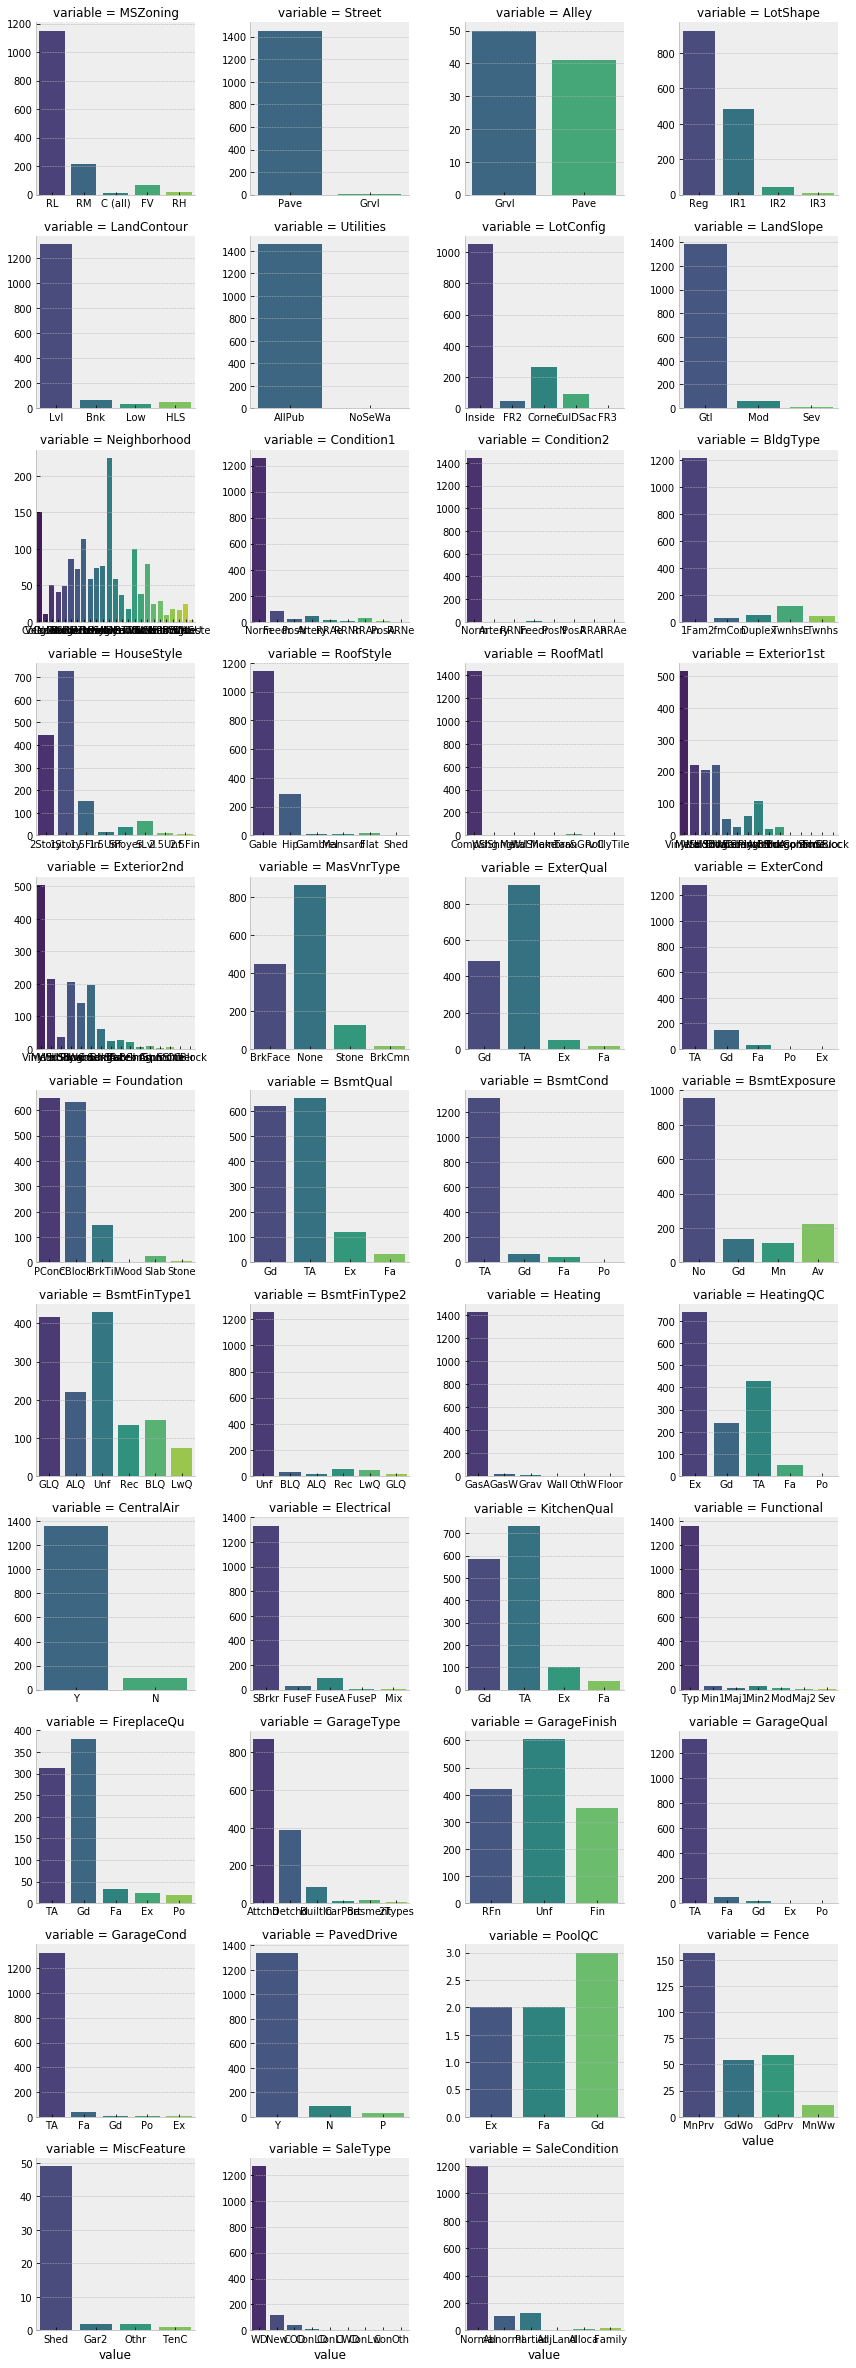

In [148]:
#To create a FacetGrid plot for all the categorical features

cat_melt = pd.melt(train,id_vars=['SalePrice'],value_vars=[i for i in categorical_features])
g = sns.FacetGrid(cat_melt,sharex = False,sharey=False,col='variable',col_wrap=4)
g.map(sns.countplot,'value',palette='viridis')

plt.tight_layout()


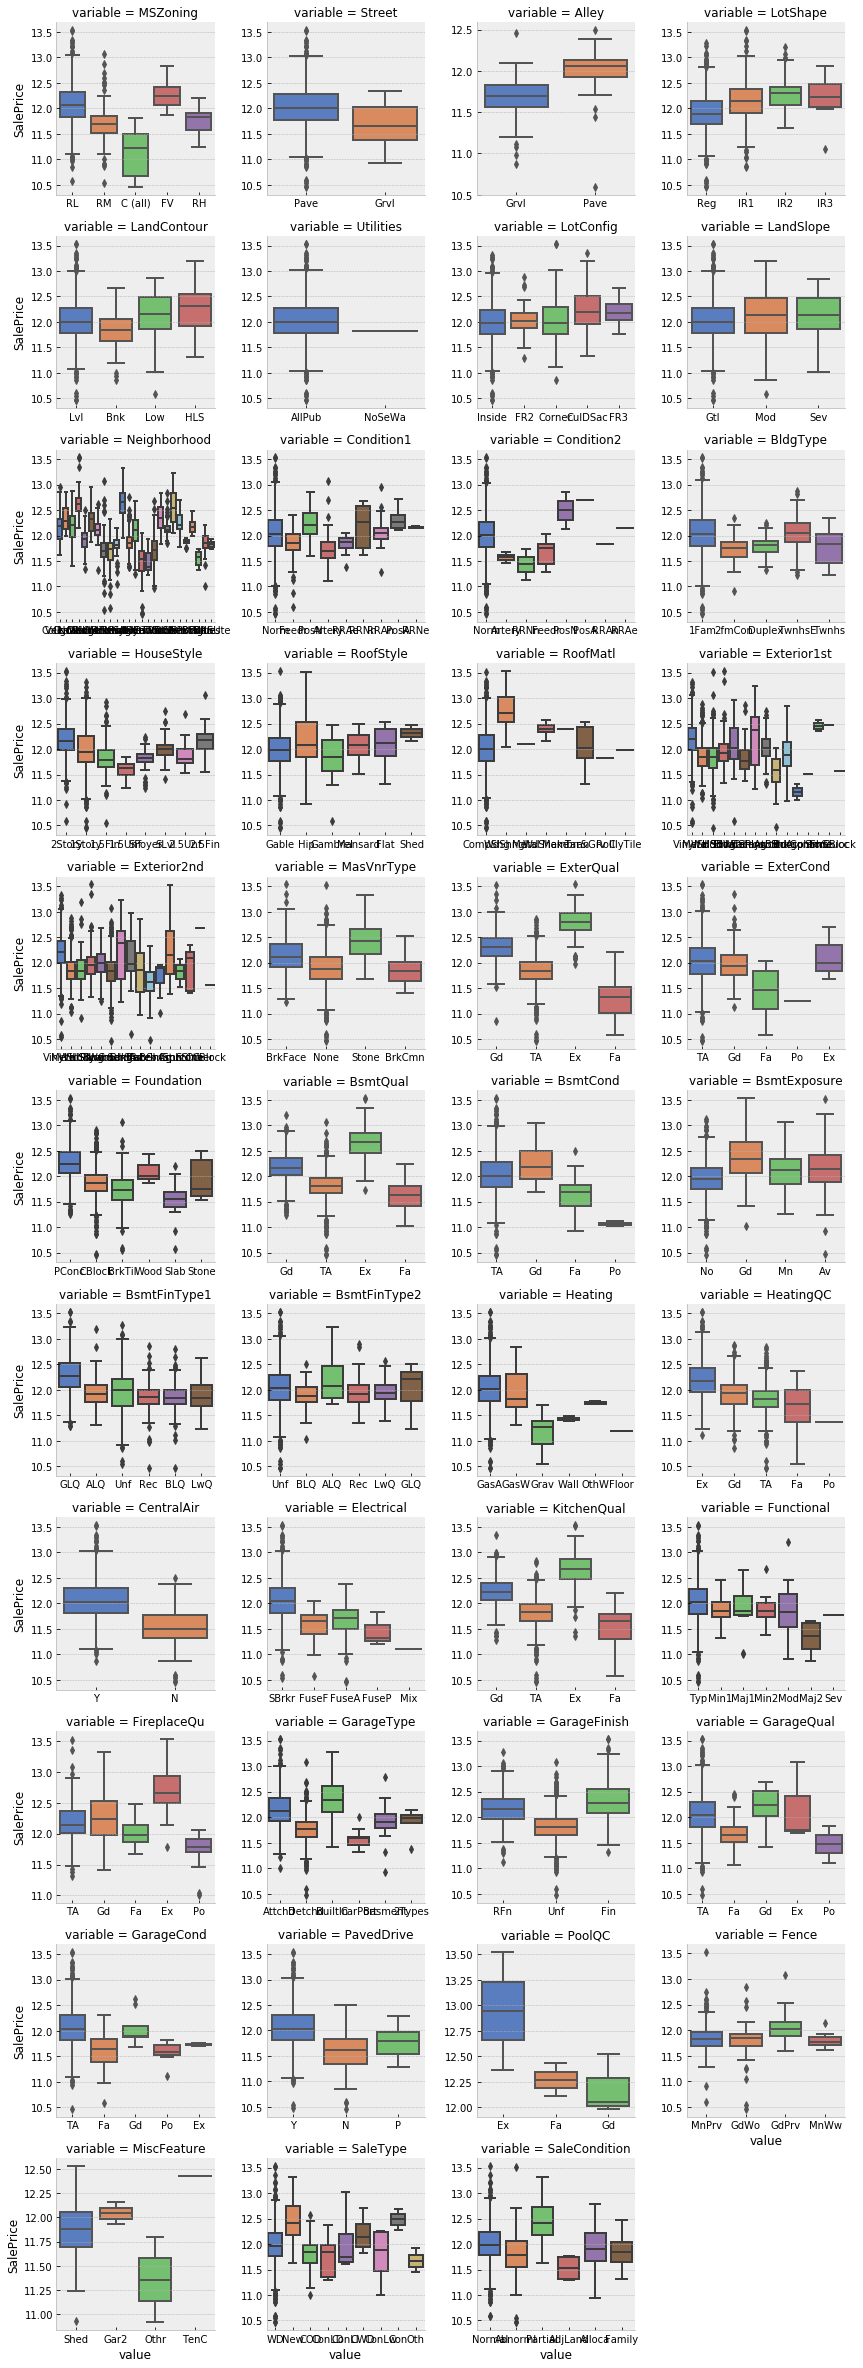

In [150]:
cat_melt = pd.melt(train,id_vars=['SalePrice'],value_vars=[i for i in categorical_features])
g = sns.FacetGrid(cat_melt,sharex = False,sharey=False,col='variable',col_wrap=4)
g.map(sns.boxplot,'value','SalePrice',palette='muted')

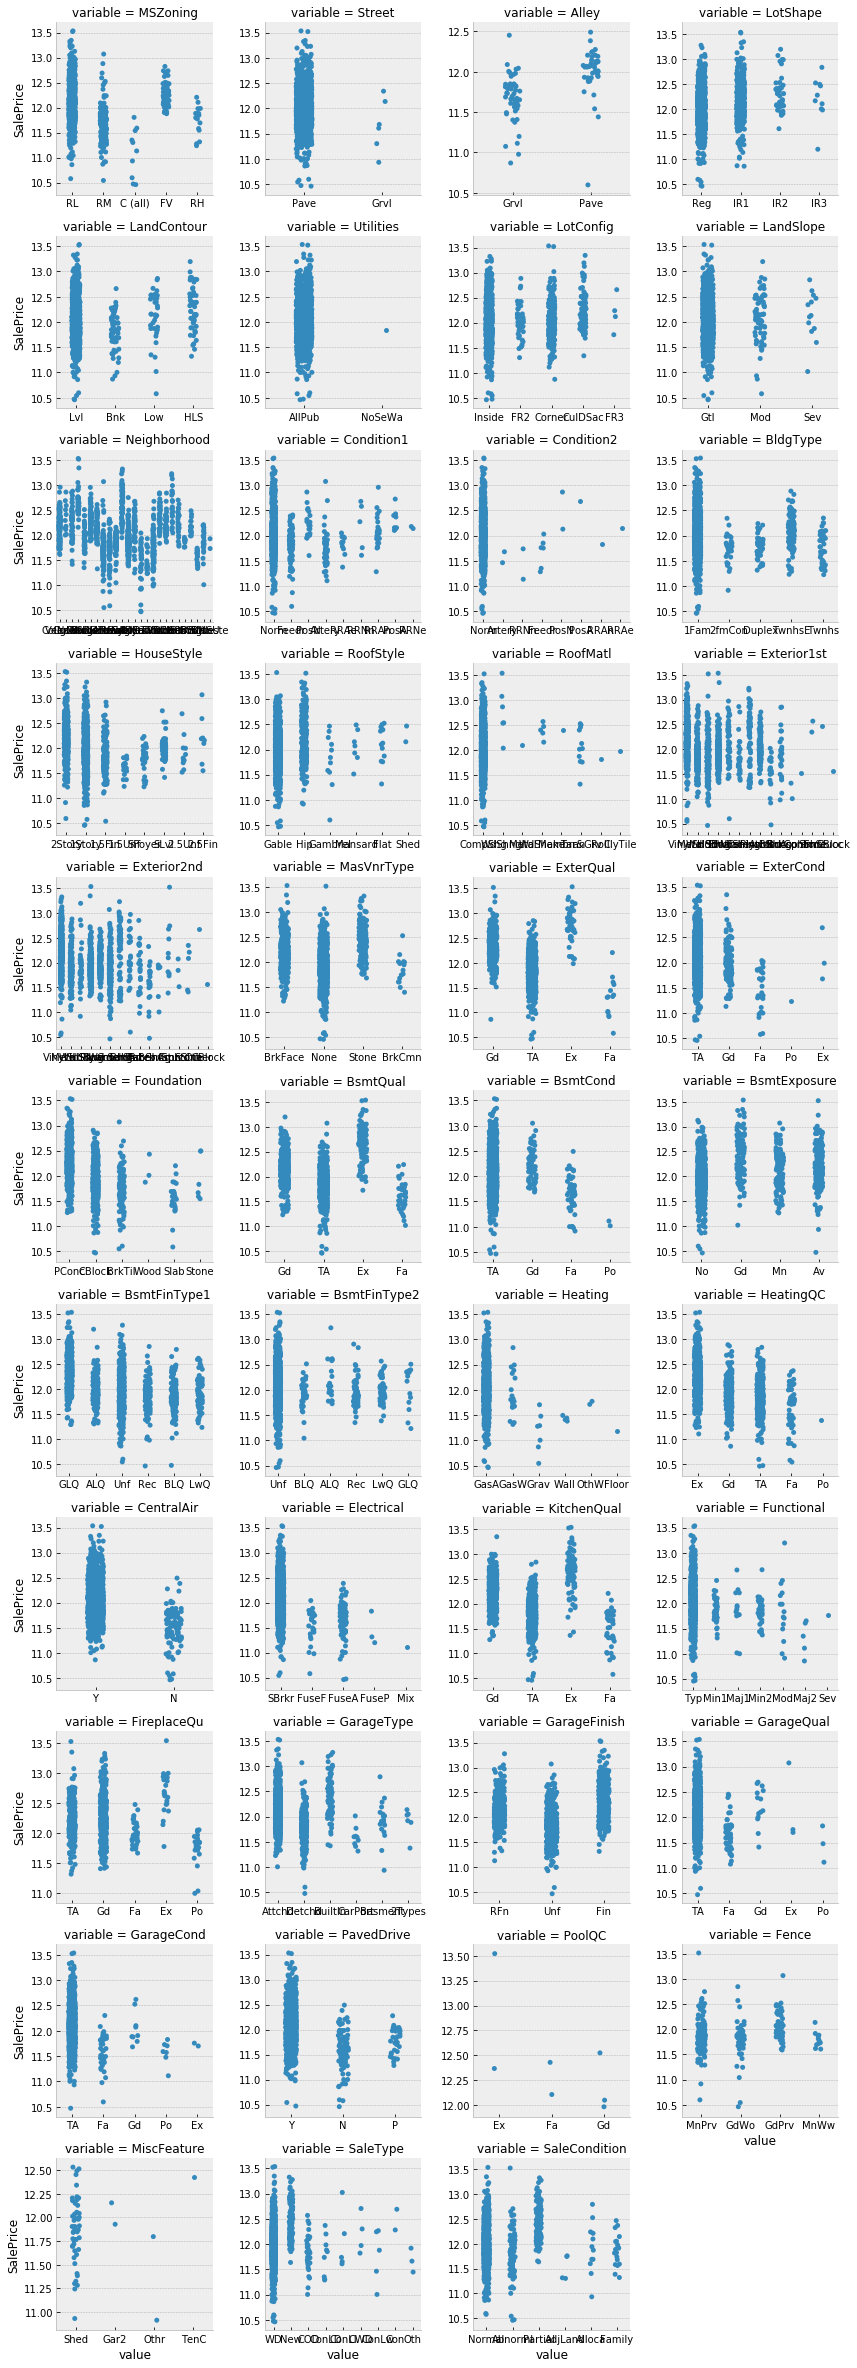

In [151]:
cat_melt = pd.melt(train,id_vars=['SalePrice'],value_vars=[i for i in categorical_features])
g = sns.FacetGrid(cat_melt,sharex = False,sharey=False,col='variable',col_wrap=4)
g.map(sns.stripplot,'value','SalePrice')

In [156]:
#Majoring into the DataCleaning Aspect
#We are gonna fill the categorical features with None and the numerical features with 0

In [157]:
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [158]:
numerical_features.columns


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [172]:
data_merged['PoolQC'].fillna('None',inplace=True)

In [173]:
data_merged['MiscFeature'].fillna('None',inplace=True)

In [174]:
data_merged['Alley'].fillna('None',inplace=True)

In [175]:
data_merged['Fence'].fillna('None',inplace=True)

In [176]:
data_merged['FireplaceQu'].fillna('None',inplace=True)

In [177]:
data_merged['LotFrontage'] = data_merged.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.mean()))

In [178]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    data_merged[col] = data_merged[col].fillna('None')

In [179]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    data_merged[col] = data_merged[col].fillna(0)

In [180]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data_merged[col] = data_merged[col].fillna(0)

In [181]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data_merged[col] = data_merged[col].fillna('None')

In [182]:
data_merged["MasVnrType"] = data_merged["MasVnrType"].fillna("None")
data_merged["MasVnrArea"] =data_merged["MasVnrArea"].fillna(0)

In [190]:
data_merged.isnull().sum().sort_values(ascending=False)

SalePrice       1459
Utilities          2
BsmtUnfSF          0
BsmtFinSF2         0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
YearRemodAdd       0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
RoofStyle          0
YearBuilt          0
Heating            0
LandContour        0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
Alley              0
LotShape           0
                ... 
ScreenPorch        0
PoolArea           0
PoolQC             0
Fence              0
MiscFeature        0
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
GarageCars         0
GarageFinish       0
GarageYrBlt        0
FullBath           0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF 

In [185]:
data_merged['MSZoning'].fillna(data_merged['MSZoning'].mode()[0],inplace=True)

In [189]:
for cols in ('Electrical','SaleType','Exterior1st','KitchenQual','Exterior2nd','Functional'):
    data_merged[cols].fillna(data_merged[cols].mode()[0],inplace=True)

In [191]:
data_merged.drop('Utilities',inplace=True,axis=1)

In [192]:
data_merged['MSSubClass'] = data_merged['MSSubClass'].apply(str)


data_merged['OverallCond'] = data_merged['OverallCond'].astype(str)
#Year and month sold are transformed into categorical features.
data_merged['YrSold'] = data_merged['YrSold'].astype(str)
data_merged['MoSold'] = data_merged['MoSold'].astype(str)

In [194]:
#Applying LabelEncoding to some categorical Features
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond','ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1',  'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond')
lbe = LabelEncoder()
for col in cols:
        lbe.fit(list(data_merged[col].values))
        data_merged[col] = lbe.transform(list(data_merged[col].values))
    

In [195]:
data_merged = pd.get_dummies(data_merged)

In [199]:
ntrain = len(train)
train = data_merged[:ntrain]
test = data_merged[ntrain:]

test.drop('SalePrice',axis=1,inplace=True)

In [200]:
#Straight to the Predictive Modelling Techniques


In [216]:
#Models Being Used :-
#> LassoRegression
#> Gradient Boosting Regression
# Import libraries >>>
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error



In [217]:
#Defining the Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [219]:
#LassoRegression
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [220]:
#GradientBoostingRegression
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [222]:
#Evaluating the Models
y_train = np.log(y_train)

In [223]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.0007 (0.0000)



In [224]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.0784 (0.0088)

